# I. Introduction

In the rapidly evolving job market, the task of screening resumes has become increasingly challenging and time-consuming. With a deluge of applications for each open position, human resource departments and recruiters often struggle to efficiently identify the most qualified candidates. This project aims to address this challenge by leveraging the power of Natural Language Processing (NLP) and machine learning, utilizing a unique dataset obtained from a major IT company based in London.

The primary objective of this project is to develop an automated system capable of analyzing and classifying resumes with high accuracy. By parsing through various sections of a resume, such as education, experience, skills, and certifications, the system seeks to identify the most pertinent candidates for specific job roles. This process not only promises to significantly reduce the manual effort involved in the initial stages of the recruitment process but also aims to enhance the fairness and objectivity of candidate selection.

Methodologically, the project employs advanced NLP techniques for data preprocessing and feature extraction, using a robust dataset provided by the London-based IT company. The core of the system is built upon machine learning algorithms, specifically the K-Nearest Neighbors (KNN) classifier and the One-vs-Rest (OvR) strategy for multi-class classification. These techniques are chosen for their effectiveness in handling text data and their ability to classify resumes into various job categories accurately.

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is employed to transform textual data into a format suitable for machine learning models. This approach enhances the model's ability to understand and prioritize the relevance of different terms in the resumes.

In summary, this project stands at the intersection of technology and human resource management, aiming to revolutionize how resumes are screened and processed. By automating this crucial aspect of recruitment, we anticipate not only a more efficient hiring process but also a more inclusive and unbiased approach to candidate selection, supported by the valuable insights derived from the dataset of a leading IT firm in London.

# ***The dataset can be downloaded*** [here](https://drive.google.com/file/d/1PEYkbMpHUfybhfhKU7D72c65btaEOgsV/view?usp=sharing).


#II. Import Libraries

In [1]:
# Used for data manipulation and analysis
import pandas as pd
# Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays
import numpy as np

# Used for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt
import seaborn as sns
# Helps in visualizing word frequency in a text as a cloud-like image
from wordcloud import WordCloud
# Supports convenient and rapid tallies of large collections of data
from collections import Counter
# A toolkit for building Python programs to work with human language data
import nltk
from nltk.corpus import stopwords

# Provides regular expression matching operations similar to those found in Perl
import re

# Used for encoding target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
# Converts a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
# Splits arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# Implements learning based on the k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# Supports multi-class classification by applying a strategy of fitting one classifier per class
from sklearn.multiclass import OneVsRestClassifier
# Computes subset accuracy for the predicted labels
from sklearn.metrics import accuracy_score

# Implements binary protocols for serializing and de-serializing a Python object structure
import pickle
# Installs the dill module, which extends Python's pickle module for serializing and de-serializing Python objects
!pip install dill
#  Used for serializing and de-serializing Python objects, especially those containing more complex data types
import dill

# III. Data Loading

In [2]:
# Used to load a dataset
df_main = pd.read_csv ("/content/UpdatedResumeDataSet.csv")

## Data Overview

In [3]:
# To see the first five rows of DataFrame df_main
df_main.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
# To find out the number of rows and columns of a dataframe
df_main.shape

(962, 2)

In [5]:
# To provide detailed information about DataFrame df_main
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [6]:
# To count the number of occurrences of each unique value in the 'Category' column
df_main['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [7]:
# Check for missing values
missingvalues_per_column = df_main.sum()
print(missingvalues_per_column)

Category    Data ScienceData ScienceData ScienceData Scien...
Resume      Skills * Programming Languages: Python (pandas...
dtype: object


In [8]:
# Check for missing values percentage
missing_percentage = df_main.isnull().mean() * 100
missing_percentage


Category    0.0
Resume      0.0
dtype: float64

In [9]:
# To retrieve unique values from 'Category' column in DataFrame (df_main)
df_main['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [10]:
# To access the value from the 'Category' column in the first row
df_main['Category'][0]

'Data Science'

In [11]:
# To access the value from the 'Resume' column in the first row
df_main['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

### Summary of Data Overview

1.  The dataset consists of 962 rows and 2 columns.
2.  All values in the column are of type string
    (object).
3. 'Java Developer' is the unique value that appears the most in the ***'Category'*** column (84 times).
4. No missing values were detected.

# IV. Exploratory Data Analysis (EDA)

Before I explore further, I will copy the dataframe, so that the original dataframe can be reused if needed without changing its shape.

In [12]:
df = df_main.copy()

Now, I will use dataframe 'df' henceforth

## Number of Resumes per Job Category

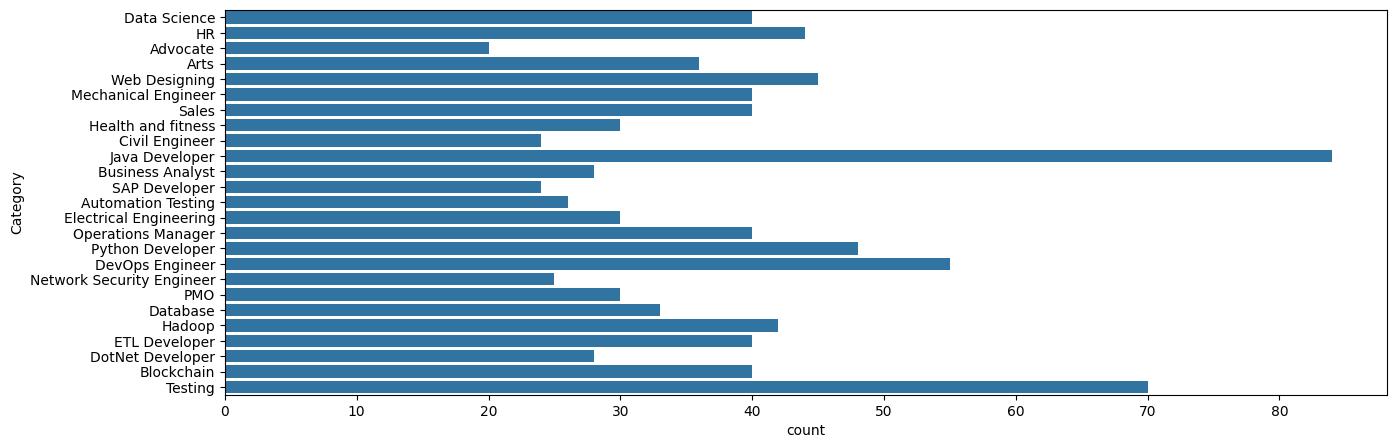

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

Based on the analysis of the number of resumes per job category from the dataset, here are some professional insights that can be derived:

**1. Dominant Categories**: The "Java Developer" category has the highest number of resumes, followed by "Testing" and "DevOps Engineer". This suggests a likely high demand and an ample supply of professionals in these fields.

**2. Moderately Represented Categories**: Fields such as "Web Designing", "HR", and "Hadoop" have a moderate representation, indicating a balance between demand and supply for these professions.

**3. Potential Areas for Development**: "Advocate" and "Civil Engineer" are among the categories with fewer resumes. This could indicate areas where the HR department might focus on talent development or recruitment efforts.

**4. Recruitment Balance**: Categories with an equal number of resumes like "Data Science", "Sales", "Mechanical Engineer", "Operations Manager", "ETL Developer", and "Blockchain", show a balance in the availability of talent.

For the HR department, these insights can be utilized to:

**1. Evaluate Recruitment Strategies**: Assess the effectiveness of current recruitment strategies and adjust them to meet the evolving needs of the organization.

**2. Identify Skill Gaps**: Understand where there may be a shortage of skills that need to be addressed through recruitment or training initiatives.
Map Training Needs: Identify areas where training can enhance the existing workforce's skills to meet changing market demands.

## Frequently Appearing Letters: Applicants for The Position 'Java Developer'

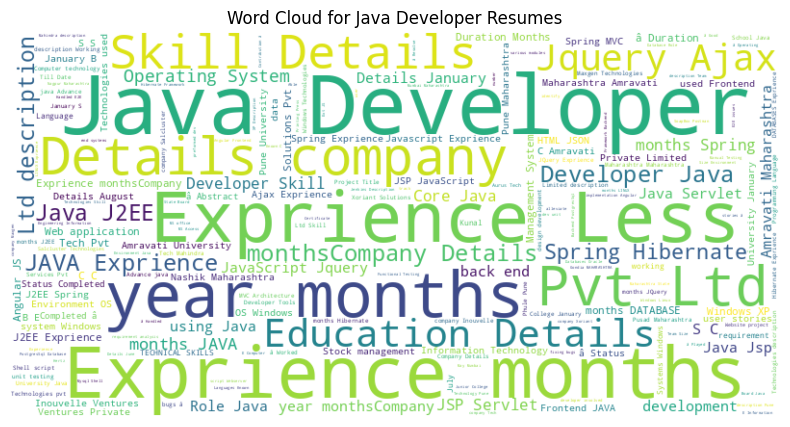

In [14]:
# Select a category for the word cloud, for example, "Java Developer"
selected_category = 'Java Developer'
resumes_in_category = df[df['Category'] == selected_category]['Resume']

# Combine all resumes in the selected category into one text
combined_text = ' '.join(resumes_in_category)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {selected_category} Resumes')
plt.show()

Insights from the Word Cloud:

1. **Keyword Frequency**: The prominence of words such as "Java", "Developer", "Experience", "Company", and "Skill" indicates these are common elements within the resumes. This suggests that Java development roles are commonly associated with substantial experience and a variety of technical skills.

2. **Technical Proficiencies**: Specific technologies and frameworks like "J2EE", "Spring", "JavaScript", "Servlet", and "Angular JS" appear frequently, which highlights the technical proficiencies that candidates in this category possess. This can inform HR about the technical qualifications they should look for in potential candidates.

3. **Experience Emphasis**: The word "months" appears prominently, often in proximity to "experience". This suggests that candidates are emphasizing the duration of their experience, which may be a critical factor in hiring decisions.

4. **Education Background**: Terms like "Education", "University", and "Tech" indicate that academic background is a significant component of these resumes, potentially guiding HR to consider educational qualifications when screening candidates.

Utility for the HR Department:

1. **Streamlined Resume Screening**: The visualization aids in quickly identifying key terms and skills that are relevant to Java Developer positions, streamlining the resume screening process.

2. **Tailored Job Descriptions**: By understanding the common language used by applicants, HR can tailor job descriptions to better reflect the skills and experiences that are actually present in the job market.
3. **Benchmarking Candidates**: HR professionals can use the most frequent terms as a benchmark to evaluate individual resumes, ensuring that candidates meet the commonly expected standards in the field.

4. **Focused Training Programs**: Identifying gaps between the desired skills and those frequently mentioned can help HR to initiate focused training programs that aim to upskill employees in less mentioned but critical areas.
Strategic Hiring Decisions: Insights from the word cloud can assist in making strategic hiring decisions, such as focusing on particular skills that are less represented but may be crucial for the company’s technological growth.

It's clear that such a visualization is not only a tool for summarizing data but also for strategic planning and decision-making within the HR department, providing a snapshot of market trends and candidate profiles in the realm of Java development.

## Resume Lengths by Category

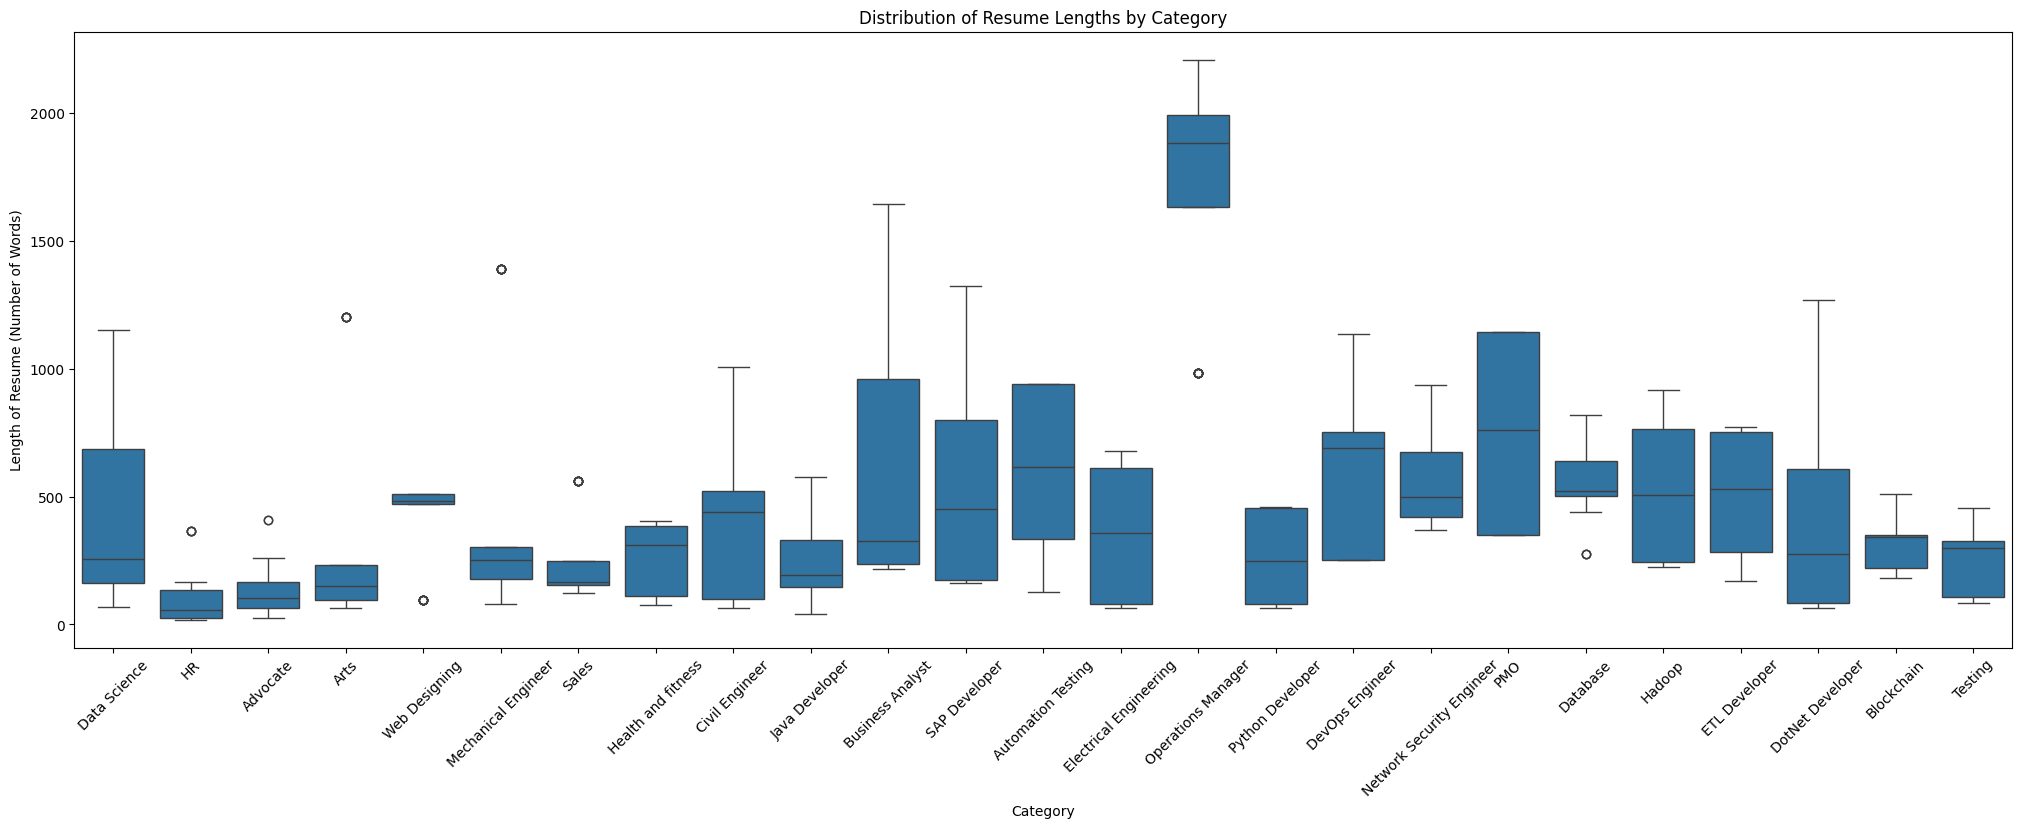

In [15]:
# Calculate the length of each resume in words
df['Resume_Length'] = df['Resume'].apply(lambda x: len(x.split()))

# Plotting the distribution of resume lengths for each category
plt.figure(figsize=(25, 8))
sns.boxplot(x='Category', y='Resume_Length', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Resume Lengths by Category')
plt.ylabel('Length of Resume (Number of Words)')
plt.xlabel('Category')
plt.show()

Insights from the Boxplot:

- `Variability in Content`: The boxplot shows a wide range of resume lengths across categories. For instance, 'Data Science' and 'DevOps Engineer' categories show a larger spread in resume length, indicating a higher variability in how candidates present their information.

- `Category-Specific Norms`: Some categories, like 'HR' and 'Advocate', have resumes that tend to be shorter, suggesting these fields may prefer concise resumes or that the necessary information to convey one's qualifications in these fields is less verbose.

- `Potential Over-Elaboration`: Categories with a high number of outliers or long upper whiskers, such as 'Data Science' and 'Operations Manager', may indicate a tendency for candidates to over-elaborate or include less relevant information.

- `Optimal Resume Length`: The median lengths and interquartile ranges can inform HR about the typical resume length for each category, helping to set benchmarks for what constitutes an optimally detailed resume.

Utility for the HR Department:

1. `Standardizing Screening Processes`: Understanding typical resume lengths can help HR standardize the screening process, knowing when a resume may be too brief or excessively long for a given category.

2. `Guidance for Applicants`: HR can use these insights to advise applicants on how to tailor their resumes to industry standards, potentially improving the quality of applications received.

3. `Identifying Key Information`: A resume's length may reflect the complexity of experiences and skills necessary to convey. HR can focus on the most relevant information for each category when reviewing resumes.

4. `Efficiency in Review`: For categories with typically shorter resumes, HR can allocate less time per review, increasing efficiency. Conversely, categories with longer resumes may require more in-depth review.

5. `Quality Control`: Outliers can be a point of interest for HR, signaling resumes that deviate significantly from the norm which may need additional scrutiny to assess their relevance and quality.

The distribution of resume lengths is a critical piece of metadata that HR departments can leverage to optimize their recruitment processes, ensuring they can quickly identify the most promising candidates within the context of industry and role-specific communication norms.

# V. Text Cleaning

In [16]:
# This function aims to clean the resume text from several elements that are not needed or can interfere with NLP analysis.
def cleanResume(txt):
    cleanText = re.sub('http\S+\s',' ',txt)
    cleanText = re.sub('RT|cc',' ',cleanText)
    cleanText = re.sub('@\S+',' ',cleanText)
    cleanText = re.sub('#\S+',' ',cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_'{|}~"""),' ',cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]',' ',cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)

    return cleanText

In [17]:
# Cleaning the entire 'Resume' column in DataFrame 'df' using the 'cleanResume' function
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [18]:
# Check one of the rows in the 'Resume' column after cleaning. Cleaning has been successfully carried out.
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

# VI. Data Preprocessing

### Words Into Categorical values

In [19]:
# Converting labels or class categories from a dataset into numbers, so that they can be used by machine learning models that require numerical input
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [20]:
# Check the labels after label encoding
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

 **Category Mapping**
- 0	= "Advocate"
- 1	= "Arts"
- 2	= "Automation Testing"
- 3	= "Blockchain"
- 4	= "Business Analyst"
- 5	= "Civil Engineer"
- 6	= "Data Science"
- 7	= "Database"
- 8	= "DevOps Engineer"
- 9	="DotNet Developer"
- 10	= "ETL Developer"
- 11	= "Electrical Engineering"
- 12	= "HR"
- 13	="Hadoop"
- 14	= "Health and fitness"
- 15	="Java Developer"
- 16	= "Mechanical Engineer"
- 17	= "Network Security Engineer"
- 18	= "Operations Manager"
- 19	= "PMO"
- 20	= "Python Developer"
- 21	= "SAP Developer"
- 22	= "Sales"
- 23	= "Testing"
- 24	= "Web Designing"
- outside the data above	= "Unknown"

# VII.Data Preprocessing

## TF-IDF Vectorization

In [21]:
# To convert text from column 'Resume' in DataFrame 'df' to TF-IDF vector representation
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

## Train-Test Split

In [22]:
# Divide the dataset into two subsets: one for training and one for testing
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [23]:
# To find out the shape of the X_train variable
X_train.shape

(769, 7351)

In [24]:
# # To find out the shape of the X_test variable
X_test.shape

(193, 7351)

Now, let's train the model and print the classification report.

# VIII. Model Evaluation

In [25]:
# This code aims to train a classification model using the KNN algorithm, then using a "One-vs-Rest" (or "One-vs-All") approach, and measure its performance with accuracy on test data.
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(ypred)
print('Accuracy Score:')
print(accuracy_score(y_test,ypred))

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
Accuracy Score:
0.9844559585492227


Based on the results, with an accuracy score of approximately 0.9845, several conclusions can be drawn from this project:

- Robust Classification Model: The classification model built, using the K-Nearest Neighbors (KNN) algorithm with TF-IDF vector representation, achieved a very high level of accuracy (around 98.45%). This indicates that the model can effectively classify resume texts into the correct categories.

- Effective Text Preprocessing: The text preprocessing steps applied, including text cleaning, TF-IDF vectorization, and label encoding, have helped improve data quality and adequately prepare the data for the model.

# IX. Model Saving

In [26]:
# Used to store (serialize) three objects related to the NLP model and preprocessing data processes into files so that they can be reused in the future without the need to retrain the model or rebuild the preprocessing functions
pickle.dump(tfidf, open('tfidfd.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
with open('cleanResume_function.dill', 'wb') as file:
    dill.dump(cleanResume, file)